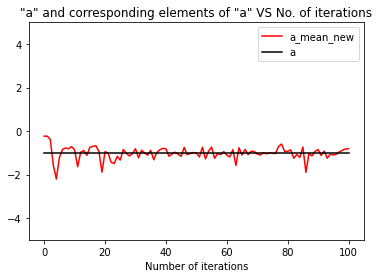

In [1]:

import matplotlib.pyplot as plt

import numpy as np
import random
######################################################################
######################################################################
np.random.seed(1)
#Given system parameters
ek_mean=0
ek_var=1
vk_mean=0
vk_var=0.5

x0_mean=1
x0_var=2

#Intitalization
states=[]
observations=[]

#Initial state
x0=np.random.normal(x0_mean,np.sqrt(x0_var))
states.append(x0)

# iterations 100
a=-1
xk=x0
for i in range(100):
  ek=np.random.normal(ek_mean,np.sqrt(ek_var))
  vk=np.random.normal(vk_mean,np.sqrt(vk_var))
  xk1=a*xk + ek
  yk=np.sqrt(np.power(xk,2)+1) + vk
  states.append(xk1)
  observations.append(yk)
  xk=xk1


######################################################################
######################################################################
#Initialization
b=0.5 #beta

xkk_mean=x0_mean
xkk_var=x0_var
akk_mean=-0.2
akk_var=1


#########New set of equations
X_mean=np.zeros(2)
X_var = np.zeros((2,2))

#Inital means of new state equations
X_mean[0]=xkk_mean * akk_mean
X_mean[1] = akk_mean

#Initial Covariance of new state equations
X_var[0,:] = [xkk_var,0]
X_var[1,:] = [0,akk_var]

#Initialization of updated mean and covariances
X1_mean=np.zeros(2)
X1_var = np.zeros((2,2))

new_means = None
new_vars = None
i = 0
for yk in observations:

    # propagation step mean
    X1_mean[0] = X_mean[0] * X_mean[1]
    X1_mean[1] = X_mean[1]

    #Propagation step covariance and jacobian
    J = np.array([[X_mean[1], X_mean[0]],[0,1]])#Jacobian J
    X1_var = np.dot(J ,np.dot( X_var,np.transpose(J))) + np.array([[ek_var, 0],[0, b]])#covariance

    # Updation step
    #Jacobian C
    first = X1_mean[0] / np.sqrt(np.power(X1_mean[0], 2) + 1)
    C = np.array([[first, 0]])

    # kalman gain
    num = np.dot(X1_var, np.transpose(C))
    deno = np.dot(C, np.dot(X1_var, np.transpose(C))) + vk_var
    K_gain = num / deno

    # EKF equations after 1 observation
    I = np.array([[1, 0], [0, 1]])
    X1_mean_1 = X1_mean.reshape(-1, 1) + (K_gain * (yk - np.sqrt(np.power(X1_mean[0],2)+1)))
    X1_var_1 = np.dot((I - np.dot(K_gain, C)) , X1_var)
    # new means and covariances
    if i ==0:
        new_means = X1_mean_1
        new_vars = X1_var_1
        i=1

    if i!=0:
        new_means = np.hstack((new_means, X1_mean_1))
        new_vars = np.dstack((new_vars, X1_var_1))

    if i==2:
        break
    # intialize for new iteration
    X_mean = X1_mean_1.flatten()
    X_var = X1_var_1


######################################################################
######################################################################
# plots
X = range(len(new_means[0]))
plt.plot(X, new_means[1], label='a_mean_new', c='r')
plt.plot(X, a* np.ones(len(new_means[0])), label='a', color='black')
plt.xlabel('Number of iterations')
plt.title('"a" and corresponding elements of "a" VS No. of iterations')
plt.ylim((-5,5))
plt.legend()
plt.show()